# PCAMIX wine ggplot2

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
cars = pd.read_csv('./data/acpm_cars.txt', delimiter = " ",header=0,index_col=0)
cars.head()

,CONS,CYLI,VITE,VOLU,RP/P,LONG,FISC,MARQ,PRIX
NOM,,,,,,,,,
AS2,6.2,998,140,955,23.2,3.40,4CV,ETRA,CP1
CI4,5.6,954,145,1170,19.4,3.50,4CV,FRAN,CP1
PE6,6.7,993,145,1151,20.8,3.61,4CV,FRAN,CP2
FI3,6.3,999,140,1088,21.8,3.64,4CV,ETRA,CP1
FI5,6.2,999,145,968,21.5,3.64,4CV,ETRA,CP2


In [3]:
cars2 = cars.copy()
cars2.columns = [x+"2" for x in cars2.columns]
cars3 = cars.copy()
cars3.index = [x+"2" for x in cars3.index]
Cars = pd.concat((pd.concat((cars,cars3),axis=0),cars2),axis=1)
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, AS2 to VW32
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CONS    54 non-null     float64
 1   CYLI    54 non-null     int64  
 2   VITE    54 non-null     int64  
 3   VOLU    54 non-null     int64  
 4   RP/P    54 non-null     float64
 5   LONG    54 non-null     float64
 6   FISC    54 non-null     object 
 7   MARQ    54 non-null     object 
 8   PRIX    54 non-null     object 
 9   CONS2   27 non-null     float64
 10  CYLI2   27 non-null     float64
 11  VITE2   27 non-null     float64
 12  VOLU2   27 non-null     float64
 13  RP/P2   27 non-null     float64
 14  LONG2   27 non-null     float64
 15  FISC2   27 non-null     object 
 16  MARQ2   27 non-null     object 
 17  PRIX2   27 non-null     object 
dtypes: float64(9), int64(3), object(6)
memory usage: 10.1+ KB


In [4]:
from scientisttools import MPCA
res_mpca = MPCA(n_components= 5,quanti_sup=list(range(9,15)),quali_sup=[15,16,17],ind_sup=list(range(cars.shape[0],Cars.shape[0])))
res_mpca.fit(Cars)

Missing values are imputed by the mean of the variable.


MPCA(ind_sup=[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
              43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
     n_components=5, quali_sup=[15, 16, 17],
     quanti_sup=[9, 10, 11, 12, 13, 14])

## Eigenvalues

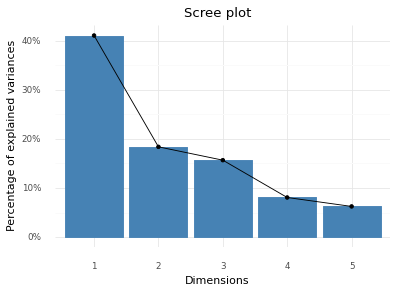

In [5]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mpca)
print(p)

## Individuals Factor Map

### Color by RGB colors

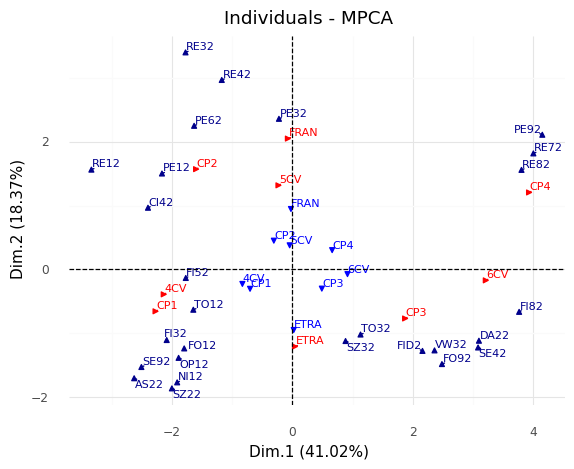

In [6]:
from scientisttools import fviz_mpca_ind
p = fviz_mpca_ind(res_mpca,repel=True)
print(p)

In [7]:
import plotnine as pn
ind = res_mpca.ind_["coord"]
ind["cos2"] = res_mpca.ind_["cos2"].iloc[:,:2].sum(axis=1)
p =  pn.ggplot()
p = p + pn.geom_point(ind,pn.aes(x="Dim.1",y="Dim.2",color="cos2"))
print(p)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,cos2
AS2,-2.626868,-1.700462,1.403855,0.374420,-1.431409,0.558574
CI4,-2.397295,0.966126,1.758490,0.827966,-1.324621,0.458741
PE6,-1.631235,2.247254,0.329646,-0.568445,1.283136,0.606847
FI3,-2.086566,-1.102789,0.837737,0.359289,0.400727,0.702753
FI5,-1.769700,-0.132189,-0.580175,-1.282820,1.868576,0.300255
FI8,3.766185,-0.661957,1.355248,-1.455975,-0.049329,0.707176
FID,2.161129,-1.272850,-0.715298,1.044895,0.709465,0.700685
FO1,-1.795874,-1.233806,0.752408,0.108646,0.327720,0.697422
RE7,4.002668,1.815679,1.850259,-0.808617,-0.566181,0.781237
NI1,-1.912613,-1.764613,0.130560,-1.156757,-0.415251,0.656943


### Color by Cos2

In [8]:
p = fviz_mpca_ind(res_mpca,color="cos2",repel=True)
print(p)

cos2


PlotnineError: "Could not evaluate the 'color' mapping: 'cos2' (original error: name 'cos2' is not defined)"

In [ ]:
from scientisttools import fviz_corrplot
p = fviz_corrplot(res_mpca.ind_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

### Color by contrib

In [ ]:
p = fviz_mpca_ind(res_mpca,color="contrib",repel=True)
print(p)

### Color by quantitatives columns

In [ ]:
p = fviz_mpca_ind(res_mpca,color="CONS",repel=True)
print(p)

### Color by actives qualitatives columns

In [ ]:
p = fviz_mpca_ind(res_mpca,habillage="FISC",repel=True)
print(p)

### Color by supplementary qualitatives columns

In [ ]:
p = fviz_mpca_ind(res_mpca,habillage="FISC2",repel=True,add_ellipses=True)
print(p)

### Color by numpy array

In [ ]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_mpca.call_["X"].shape[0])
p = fviz_mpca_ind(res_mpca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mpca.ind_["coord"])
p = fviz_mpca_ind(res_mpca,color=kmeans,repel=True)
print(p)

### Set limits

#### Limit cos2

In [ ]:
p = fviz_mpca_ind(res_mpca,lim_cos2=0.50,repel=True)
print(p)

#### limit contrib

In [ ]:
p = fviz_mpca_ind(res_mpca,lim_contrib=20,repel=True)
print(p)

## Quantitatives variables informations

### Color by RGB colors

In [ ]:
from scientisttools import fviz_mpca_col
p = fviz_mpca_col(res_mpca)
print(p)

### Color by cos2

In [ ]:
p = fviz_mpca_col(res_mpca,color="cos2")
print(p)

In [ ]:
p = fviz_corrplot(res_mpca.quanti_var_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

## Color by contrib

In [ ]:
p = fviz_mpca_col(res_mpca,color="contrib")
print(p)

### Coloor by numpy array

In [ ]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mpca.quanti_var_["coord"].shape[0])
p = fviz_mpca_col(res_mpca,color=color_numpy)
print(p)

### Color by kmeans clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mpca.quanti_var_["coord"])
p = fviz_mpca_col(res_mpca,color=kmeans)
print(p)

## Set limit

### limit cos2

In [ ]:
p = fviz_mpca_col(res_mpca,lim_cos2=0.8)
print(p)

### limit contrib

In [ ]:
p = fviz_mpca_col(res_mpca,lim_contrib=8)
print(p)

## Qualitatives variables - Categories

### Color by RGB colors

In [ ]:
from scientisttools import fviz_mpca_mod
p = fviz_mpca_mod(res_mpca,repel=True)
print(p)

### Color by cos2

In [ ]:
p = fviz_mpca_mod(res_mpca,color="cos2",repel=True)
print(p)

In [ ]:
p = fviz_corrplot(res_mpca.quali_var_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

### Color by contrib

In [ ]:
p = fviz_mpca_mod(res_mpca,color="contrib",repel=True)
print(p)

### Color by numpy array

In [ ]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mpca.quali_var_["coord"].shape[0])
p = fviz_mpca_mod(res_mpca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mpca.quali_var_["coord"])
p = fviz_mpca_mod(res_mpca,color=kmeans,repel=True)
print(p)

## Set limit

### limit cos2

In [ ]:
p = fviz_mpca_mod(res_mpca,lim_cos2=0.1,repel=True) # à corriger
print(p)

### limit contrib

In [ ]:
p = fviz_mpca_mod(res_mpca,lim_contrib=8,repel=True)
print(p)

## Variables

In [ ]:
from scientisttools import fviz_mpca_var
p = fviz_mpca_var(res_mpca,repel=True)
print(p)

In [ ]:
p = fviz_corrplot(res_mpca.var_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

## Plot contributions

In [ ]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mpca,choice="ind")
print(p)

In [ ]:
p = fviz_contrib(res_mpca,choice="quanti_var")
print(p)

In [ ]:
p = fviz_contrib(res_mpca,choice="quali_var")
print(p)

## Plot cos2

In [ ]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_mpca)
print(p)

In [ ]:
p = fviz_cos2(res_mpca,choice="quanti_var")
print(p)

In [ ]:
p = fviz_cos2(res_mpca,choice="quali_var")
print(p)

## Corrcircle

In [ ]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_mpca)
print(p)